In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [74]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [8]:
X_train.shape
# 50,000 is training sample, 32 x 32 image, 3 is for RGB channels

(50000, 32, 32, 3)

In [10]:
X_test.shape
# 10,000 is training sample, 32 x 32 image, 3 is for RGB channels

(10000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
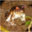

In [17]:
# Checking for the first data set(i.e first image which is divided into 3 d array)
X_train[0]

array([[[235, 235, 235],
        [231, 231, 231],
        [232, 232, 232],
        ...,
        [233, 233, 233],
        [233, 233, 233],
        [232, 232, 232]],

       [[238, 238, 238],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [236, 236, 236],
        [236, 236, 236],
        [235, 235, 235]],

       [[237, 237, 237],
        [234, 234, 234],
        [234, 234, 234],
        ...,
        [235, 235, 235],
        [235, 235, 235],
        [234, 234, 234]],

       ...,

       [[ 87,  99,  89],
        [ 43,  51,  37],
        [ 19,  23,  11],
        ...,
        [169, 184, 179],
        [182, 197, 193],
        [188, 202, 201]],

       [[ 82,  96,  82],
        [ 46,  57,  36],
        [ 36,  44,  22],
        ...,
        [174, 189, 183],
        [185, 200, 196],
        [187, 202, 200]],

       [[ 85, 101,  83],
        [ 62,  75,  48],
        [ 58,  67,  38],
        ...,
        [168, 183, 178],
        [180, 195, 191],
        [186, 200, 199]]], dtype=uint8)
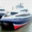

In [72]:
X_test[1]

In [75]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [29]:
y_train.shape
# 50,000 lable and 1 coz it is a 2-d array
# we can convert it into a 1-d array

(50000, 1)

In [76]:
# we make it in a 01-d array
Y_train = y_train.reshape(-1,)
Y_train[:5]
Y_test = y_test.reshape(-1,)
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
# the y lable is in 0-9 formate, so we make a list of signifecent lable to ue it further.
classes = ["airplane","automobile", "bird	", "cat	","deer","dog","frog","horse","ship","truck"]

In [33]:
classes[9]

'truck'

In [78]:
def plot_sample(X,y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

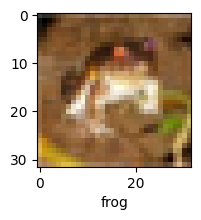

In [38]:
plot_sample(X_train,y_train,0)

**Starting the Neural network process.**

In [40]:
# We will start with normalizing the pixel values.
# Max pixel value for each color is 255 so we divide by 255 to get a continius range from 0 to 1
# since data is already in 32X32 formate so we do not re size it.

X_train = X_train[0]/255
X_test = X_test[0]/255

model_01 : Basic artficial Neural Network

In [46]:
# Creating a dense model
model_01 = tf.keras.Sequential([
    #converting into a single d array.
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(3000,activation='relu'),
    tf.keras.layers.Dense(1000,activation='relu'),
    tf.keras.layers.Dense(10,activation='sigmoid'),
])

# compilation of the data using gradient descent

model_01.compile(optimizer='SGD',
    loss ='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

# fit/ backward propogation, train data testing

model_01.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 144s 91ms/step - loss: nan - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 142s 91ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 138s 88ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 137s 88ms/step - loss: nan - accuracy: 0.1000


In [47]:
model_01.evaluate(X_test,y_test)

313/313 [==============================] - 9s 28ms/step - loss: nan - accuracy: 0.1000


[nan, 0.10000000149011612]

model_02 : CNN Model

In [50]:
# Creating a CNN model
model_02 = tf.keras.Sequential([
    #cnn
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #Dense
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])


In [51]:
 # compilation of the data using gradient descent

model_02.compile(optimizer='adam',
                 loss ='sparse_categorical_crossentropy',
                 metrics =['accuracy']
)

In [52]:
# fit/ backward propogation, train data testing

model_02.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 61s 38ms/step - loss: 2.4415 - accuracy: 0.1871 - val_loss: 1.8123 - val_accuracy: 0.3318
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6221 - accuracy: 0.4147 - val_loss: 1.4211 - val_accuracy: 0.4874
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.3202 - accuracy: 0.5298 - val_loss: 1.3162 - val_accuracy: 0.5384
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1763 - accuracy: 0.5877 - val_loss: 1.2013 - val_accuracy: 0.5704
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0677 - accuracy: 0.6284 - val_loss: 1.0954 - val_accuracy: 0.6189
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9859 - accuracy: 0.6573 - val_loss: 1.0612 - val_accuracy: 0.6384
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9124 - accuracy: 0.6819 - val_loss: 1.0953 -

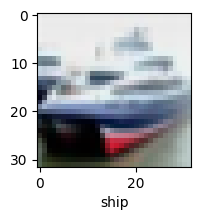

In [79]:
plot_sample(X_test,Y_test,1)

testing the data

In [81]:
y_pred = model_02.predict(X_test)
y_pred[:5]
#this is normal distribution values because of soft max

313/313 [==============================] - 3s 10ms/step


array([[7.77575746e-03, 9.00840041e-06, 3.46545801e-02, 7.41370320e-01,
        2.02627364e-03, 2.23655496e-02, 1.62138700e-01, 1.21317556e-04,
        2.93935779e-02, 1.44883146e-04],
       [2.39012390e-03, 9.31829870e-01, 9.19393551e-06, 6.58642311e-05,
        2.22014228e-06, 1.71181528e-05, 9.29749076e-05, 3.93175287e-06,
        5.45678884e-02, 1.10209612e-02],
       [1.85189530e-01, 3.32230516e-02, 1.83263086e-02, 7.37443864e-02,
        2.47135404e-02, 2.22119372e-02, 1.14451526e-02, 2.59390809e-02,
        5.48673868e-01, 5.65331019e-02],
       [8.58061492e-01, 1.78024093e-05, 1.20378934e-01, 3.32063850e-04,
        2.79465178e-03, 5.77773380e-06, 3.78611221e-05, 2.58213957e-04,
        1.81078594e-02, 5.39783196e-06],
       [1.33772101e-05, 2.81566379e-08, 1.88795328e-02, 3.39700840e-03,
        4.55890857e-02, 4.34733287e-04, 9.31681335e-01, 4.53770554e-06,
        3.19861897e-07, 6.86944901e-08]], dtype=float32)

In [84]:
# Converting into standard data
# arg max give the index of max element of np

y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [100]:
Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

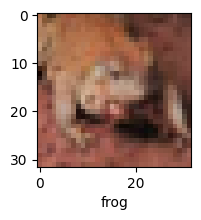

In [96]:
plot_sample(X_test,Y_test,5)

In [97]:
classes[y_classes[5]]

'frog'

In [99]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(Y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.70      0.69      1000
           1       0.87      0.73      0.79      1000
           2       0.54      0.56      0.55      1000
           3       0.46      0.46      0.46      1000
           4       0.55      0.64      0.59      1000
           5       0.60      0.48      0.54      1000
           6       0.60      0.84      0.70      1000
           7       0.77      0.67      0.72      1000
           8       0.78      0.69      0.73      1000
           9       0.77      0.78      0.77      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000

